In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_path = './npz-files/npz-files/train'

In [3]:
data = np.load(data_path + '/match_047_stream0_psd_268.npz')

In [4]:
data.files

['c1', 'c2', 'c3', 'Z', 'labels']

In [5]:
data['labels'].shape

(1953, 512)

In [6]:
data['Z'].shape

(1953, 512)

In [7]:
np.unique(data['labels'], return_counts=True)

(array([0, 1, 2, 3], dtype=int8), array([912222,  58113,  20442,   9159]))

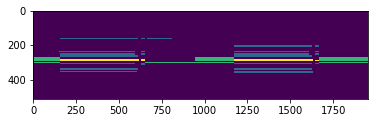

In [8]:
plt.imshow(data['labels'].T)

# plot some sample class data.

In [9]:
def plot_class_data(label_class, no=0):
    class_data = data[label_class]
    no_of_samples = data[label_class].shape[0]
    if no_of_samples <= 0:
        return
    
    start_x, start_y, end_x, end_y = class_data[no]
    plot_data = data['Z'][start_x: end_x, start_y: end_y]
    for i in range(plot_data.shape[0]):
        time_slice_plot = plot_data[i, :]
        plt.plot(time_slice_plot)
    plt.show()

In [10]:
def normalizePSD(psd, new_min=-1, new_max=1):
    """
    each PSD is normalized independently.
    normalization formula used = 
    f(x) = ((new_max - new_min) / (psd_max - psd_min)) * f(x) + new_min
    psd: numpy array with shape (1950, 512).
    """
    psd_max = np.max(psd)
    psd_min = np.min(psd)
    scaling_factor = (new_max - new_min) / (psd_max - psd_min)
    psd *= scaling_factor
    psd += new_min
    return psd

In [51]:
def plotPSDSlice(psd, index=250):
    plt.plot(psd[index])
    plt.show()

In [53]:
data['c1'].shape

(23, 4)

In [55]:
psd = normalizePSD(data['Z'])

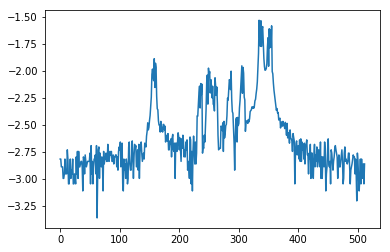

In [56]:
plotPSDSlice(psd)

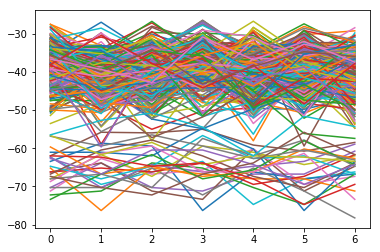

In [12]:
plot_class_data('c1', 0)

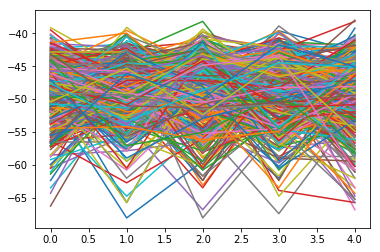

In [44]:
plot_class_data('c2', 3)

In [45]:
data['c3'].shape

(1, 4)

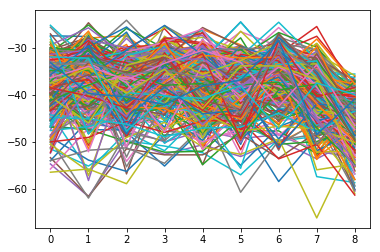

In [38]:
plot_class_data('c3')